# MTH 651: Advanced Numerical Analysis

## Lecture 9

### Topics

* Construction of Finite Element Spaces

#### Textbook references

Sections 3.1, 3.2, 3.3

### Finite Element Spaces on Meshes

We saw earlier how to define **finite elements** of arbitrary polynomial degree $k$ on a triangle $K \subset \mathbb{R}^2$.

In our construction, we defined **nodal variables** $N_i : u \mapsto u(x_i)$ at **nodal points** (or just **nodes**) $x_i$.
The $\binom{k+2}{2}$ points $x_i$ are chosen as follows:

* One point at each vertex
* $(k-1)$ points on the interior of each edge
* The remaining points are in the interior on the triangle (arranged inductively)

We proved that $\{ N_i \}$ is a basis for $\mathcal{P}_k(K)'$, and therefore there exists a **dual basis** $\{ \phi_i \}$ spanning $\mathcal{P}_k(K)$ such that
$$
    N_j(\phi_i) = \phi_i(x_j) = \delta_{ij}.
$$
In other words, every bivariate polynomial of degree at most $k$ can be **uniquely identified** by its point values at the nodal points, and, conversely, there exists a unique **interpolating polynomial** that takes on given point values at the nodes.

#### "Gluing Together" Finite Elements

Consider a triangular mesh.
By this we mean a collection of triangles such that no vertex lies in the interior of any other edge.
For example, we could think about the triangular mesh shown below.

In [1]:
%load_ext tikzmagic

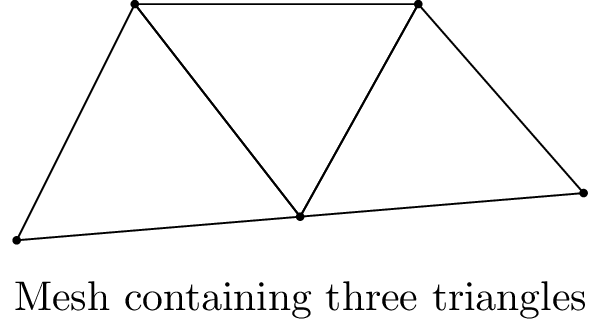

In [2]:
%%tikz -sc 2 -s 600,600

\usetikzlibrary{calc}


\coordinate (A) at (0,0);
\coordinate (B) at (1.2,0.1);
\coordinate (C) at (0.5,1);
\coordinate (D) at (1.7, 1);
\coordinate (E) at (2.4, 0.2);

\tikzset{dot/.style={circle,inner sep=0pt, minimum size=2pt, fill=black}}

\draw (A) -- (B) -- (C) -- cycle;
\draw (B) -- (D) -- (C) -- cycle;
\draw (B) -- (E) -- (D) -- cycle;

\foreach \COORD in {(A), (B), (C), (D), (E)}
    \node [dot] at \COORD {};

\node [yshift=-20pt] at (B) {Mesh containing three triangles};


Then, then, we consider **piecewise polynomials** defined in terms of the nodal variables on the mesh.
Since each edge has $(k+1)$ nodes (including the vertices), a degree-$k$ polynomial is uniquely determined on the edge, and so nodal values determine a unique, **continuous** piecewise polynomial function.

_(Execute the following cells to use with Google Colab)_

In [ ]:
%pip install mfem
%pip install glvis

In [ ]:
# needed for glvis widget
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import mfem.ser as mfem
from glvis import glvis

In [4]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(4, 4, "TRIANGLE")
glvis(mesh)

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [5]:
# Choose the polynomial degree k, we use k = 1 here
order_k = 1

# Create a finite element space defined on this mesh
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)

We now define a **grid function** on this space.
A grid function is a function $u : \Omega \to \mathbb{R}$ such that for every triangle $K \in \mathcal{T}$, we have
$$
    u|_K \in \mathcal{P}(K)
$$

In [6]:
u = mfem.GridFunction(fe_space)

Define some function, could be anything...

In [7]:
from math import cos, exp, sin

class f(mfem.PyCoefficient):
    def EvalValue(self, xvec):
        x = xvec[0]
        y = xvec[1]
        return exp(0.1*sin(5.1*x - 6.2*y) + 0.3*cos(4.3*x +3.4*y))

In [8]:
u.ProjectCoefficient(f())

In [9]:
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

We can get a better approximation by **refining** the mesh (this is called $h$-refinement, because $h$ is used to stand for the mesh size).

In [10]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(16, 16, "TRIANGLE")
order_k = 1
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

Similarly, we can get a better approximation by **increasing the polynomial degree** (this is called $p$-refinement, because $p$ is typically used to stand for the polynomial degree)

In [11]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(4, 4, "TRIANGLE")
order_k = 4
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [12]:
mesh_data = """
MFEM mesh v1.0

#
# MFEM Geometry Types (see mesh/geom.hpp):
#
# POINT       = 0
# SEGMENT     = 1
# TRIANGLE    = 2
# SQUARE      = 3
# TETRAHEDRON = 4
# CUBE        = 5
#

dimension
2

elements
154
1 2 1 23 0
1 2 48 1 2
1 2 4 49 3
1 2 7 5 6
1 2 7 8 50
1 2 8 9 51
1 2 9 10 52
1 2 10 11 53
1 2 13 11 12
1 2 11 13 53
1 2 49 88 58
1 2 63 99 64
1 2 14 15 54
1 2 55 16 17
1 2 19 17 18
1 2 17 19 55
1 2 52 91 99
1 2 69 98 70
1 2 20 21 56
1 2 22 23 57
1 2 24 58 25
1 2 25 59 26
1 2 60 27 26
1 2 27 61 28
1 2 28 62 29
1 2 29 63 30
1 2 64 31 30
1 2 65 32 31
1 2 32 66 33
1 2 67 34 33
1 2 34 68 35
1 2 35 69 36
1 2 70 37 36
1 2 37 71 38
1 2 38 72 39
1 2 39 73 40
1 2 40 74 41
1 2 41 75 42
1 2 76 43 42
1 2 77 44 43
1 2 44 78 45
1 2 45 79 46
1 2 46 80 47
1 2 47 81 24
1 2 50 5 7
1 2 48 2 82
1 2 3 82 2
1 2 4 5 83
1 2 51 50 8
1 2 51 9 52
1 2 53 52 10
1 2 13 14 84
1 2 53 13 84
1 2 54 84 14
1 2 54 15 85
1 2 55 85 16
1 2 15 16 85
1 2 24 81 58
1 2 19 20 86
1 2 55 19 86
1 2 56 86 20
1 2 21 87 56
1 2 21 22 87
1 2 25 58 59
1 2 60 26 59
1 2 60 61 27
1 2 61 62 28
1 2 63 29 62
1 2 30 63 64
1 2 64 65 31
1 2 65 66 32
1 2 67 33 66
1 2 67 68 34
1 2 69 35 68
1 2 36 69 70
1 2 70 71 37
1 2 72 38 71
1 2 39 72 73
1 2 74 40 73
1 2 75 41 74
1 2 76 42 75
1 2 43 76 77
1 2 44 77 78
1 2 79 45 78
1 2 46 79 80
1 2 81 47 80
1 2 23 1 57
1 2 83 49 4
1 2 82 3 49
1 2 5 50 83
1 2 82 49 81
1 2 82 79 48
1 2 52 63 51
1 2 56 87 76
1 2 57 87 22
1 2 57 1 48
1 2 85 69 54
1 2 88 60 59
1 2 60 89 61
1 2 88 89 60
1 2 61 90 62
1 2 91 66 65
1 2 66 92 67
1 2 66 91 92
1 2 68 67 93
1 2 94 72 71
1 2 95 73 72
1 2 72 94 95
1 2 73 96 74
1 2 97 78 77
1 2 83 50 89
1 2 50 51 90
1 2 51 63 90
1 2 87 57 97
1 2 85 55 94
1 2 90 63 62
1 2 86 56 96
1 2 58 88 59
1 2 69 85 98
1 2 98 94 71
1 2 99 91 65
1 2 80 82 81
1 2 87 77 76
1 2 89 90 61
1 2 99 65 64
1 2 92 93 67
1 2 68 54 69
1 2 98 71 70
1 2 73 95 96
1 2 78 100 79
1 2 50 90 89
1 2 54 68 93
1 2 97 100 78
1 2 81 49 58
1 2 48 79 100
1 2 57 100 97
1 2 84 54 93
1 2 57 48 100
1 2 85 94 98
1 2 95 86 96
1 2 92 84 93
1 2 53 84 92
1 2 56 74 96
1 2 55 95 94
1 2 55 86 95
1 2 63 52 99
1 2 52 53 91
1 2 74 56 75
1 2 53 92 91
1 2 49 83 88
1 2 83 89 88
1 2 77 87 97
1 2 79 82 80
1 2 56 76 75

boundary
0

vertices
101
2
0 0
0.166667 0
0.333333 0
0.5 0
0.666667 0
0.833333 0
1 0
1 0.166667
1 0.333333
1 0.5
1 0.666667
1 0.833333
1 1
0.833333 1
0.666667 1
0.5 1
0.333333 1
0.166667 1
0 1
0 0.833333
0 0.666667
0 0.5
0 0.333333
0 0.166667
0.5 0.3
0.551762 0.30682
0.599999 0.326797
0.641421 0.358579
0.673203 0.400001
0.69318 0.448238
0.7 0.5
0.69318 0.551762
0.673203 0.599999
0.641421 0.641421
0.599999 0.673203
0.551762 0.69318
0.5 0.7
0.448238 0.69318
0.400001 0.673203
0.358579 0.641421
0.326797 0.599999
0.30682 0.551762
0.3 0.5
0.30682 0.448238
0.326797 0.400001
0.358579 0.358579
0.400001 0.326797
0.448238 0.30682
0.280005 0.149304
0.545138 0.127037
0.884465 0.248218
0.879775 0.419399
0.89969 0.555741
0.87616 0.769211
0.569868 0.867996
0.215449 0.861969
0.12837 0.560993
0.128875 0.229852
0.546717 0.235246
0.597968 0.271088
0.660382 0.290877
0.715238 0.343348
0.737642 0.413364
0.786693 0.464086
0.746158 0.531455
0.736367 0.596942
0.703803 0.657558
0.66278 0.704986
0.588288 0.750518
0.529824 0.781611
0.47111 0.74969
0.386777 0.746482
0.330365 0.70905
0.29514 0.654214
0.255436 0.599614
0.235453 0.531229
0.222251 0.470237
0.25499 0.399563
0.298249 0.343499
0.344976 0.266622
0.403251 0.256459
0.472569 0.21125
0.402398 0.139935
0.73572 0.124022
0.740675 0.875314
0.437281 0.908261
0.116116 0.729319
0.125999 0.410478
0.629053 0.201535
0.746593 0.259041
0.805509 0.369895
0.801713 0.661291
0.731831 0.727419
0.653956 0.787078
0.315356 0.804965
0.252498 0.737911
0.210181 0.65531
0.207207 0.336529
0.438101 0.818434
0.801007 0.553492
0.264878 0.257489
"""
mesh_f = open("tmp.mesh", "w")
mesh_f.write(mesh_data)
mesh_f.close()


In [13]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh("tmp.mesh")
order_k = 4
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…